### EDA : Feature Engineering . Scaling
    Why are the Transformations required?
        1) Linear Regression -- Gradient Descent -- Global Minima
        2) Algorithms like KNN, K Means, hierarchial CLustering -- Euclidean Distance
##### Every point has some vectors, containing magnitude and Direction
        p1 = (x1,y1)= (24,54)
        p2 = (x2,y2)= (30,50)
##### Transformation techniques (Standardization or Scaling) 
    a) are not required in Ensemble methods, e.g., Decision Tree.
    b) are Required in Deep Learning Techniques:
        1) ANN --> Global Minima,  Gradient,
        2) CNN,
        3) RNN

# Types of Transformation
### 1) Normalization and Standardization
### 2) Scaling to Minimum and Maximum Values
### 3) Scaling to Median and Quantiles
### 4) Guassian Transformation
      ##### a)  Logarithmic Transformation
      ##### b)  Reciprocal Transformation
      ##### c)  Square Root Transformation
      ##### d)  Exponential Transformation
      ##### e)  Box Cox Transformation

# Standardization
    Aim : Bring all the variables or features to a similar scale
    OR centering the variable at Zero
    Formula:
        z = (variable-mean)/(standard deviation)
        z = (x- x_mean)/std

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# focussing on Features with Numerical Values
df = pd.read_csv('titanic_train.csv',usecols=['Survived','Pclass','Age','Fare'])
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [3]:
# counting number of Nan / null values in Each feature
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [4]:
# replacing Nan / null values with Median
df['Age'].fillna(df.Age.median(),inplace=True)
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [5]:
# cant see any Nan / Null value anymore
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 20 artists>)

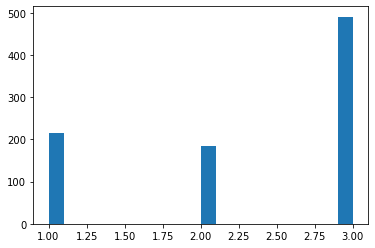

In [31]:
# plotting Histogram for Non-Standardized Data
plt.hist(df['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

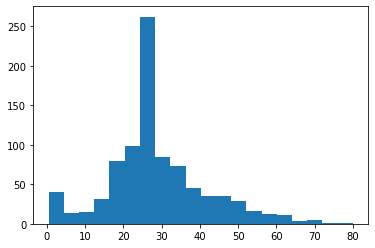

In [32]:
# plotting Histogram for Non-Standardized Data
plt.hist(df['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

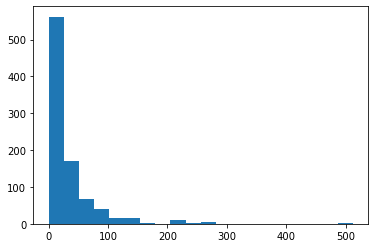

In [33]:
# plotting Histogram for Non-Standardized Data
plt.hist(df['Fare'],bins=20)

# Standardization
    By using "StandardScalar" from sklearn Library

In [6]:
from sklearn.preprocessing import StandardScaler

#### fit vs fit_transform --> Interview Question
    In summary, fit performs the training, transform changes the data in the pipeline in order to pass it on to the next stage in the pipeline, and fit_transform does both the fitting and the transforming in one possibly optimized step. fit computes the mean and std to be used for later scaling

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled
#     Formula:
        #z = (variable-mean)/(standard deviation)
        #z = (x- x_mean)/std

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [9]:
#converting it into DataFrame
pd.DataFrame(df_scaled)
# 0:Survived	1:Pclass	2:Age	3:Fare

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [11]:
# plotting charts
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

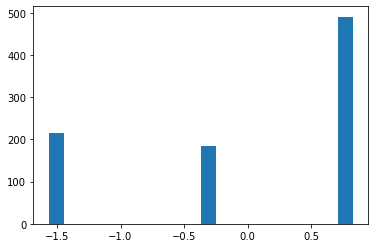

In [35]:
# plotting Histogram
plt.hist(df_scaled[:,1],bins=20)
# [:,1] covers all points of feature 1 "Class"
# same histogram as that of "Class"
# but scale is changed from (1 : 3) to (-2 : 1)
# centering the variable at Zero

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

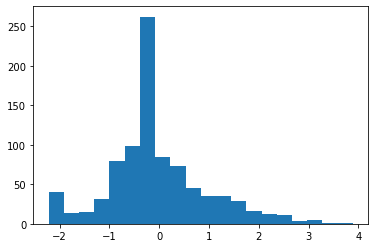

In [34]:
# plotting Histogram
plt.hist(df_scaled[:,2],bins=20)
# [:,2] covers all points of feature 2 "Age"
# same histogram as that of "Age"
# but scale is changed from (0 : 80) to (-2 : 4)
# centering the variable at Zero

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

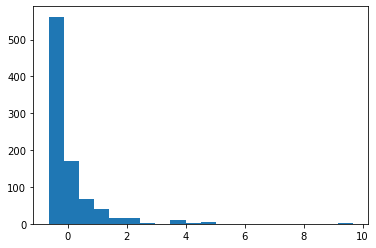

In [28]:
# plotting Histogram
plt.hist(df_scaled[:,3],bins=20)
# [:,3] covers all points of feature 3 "Fare"
# RIGHT skewed
# several outliers upto 10
# centering the variable at Zero